### О задании
Результат работы − отчет в формате ноутбуков IPython (ipynb-файл). Код пишется на Python3. Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: мне − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.    
Выполнение лабораторных работ занимает значительное время, поэтому не рекомендуем оставлять их на последний вечер перед сдачей.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) получают за всю лабораторную работу 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо в комментариях к коду указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

**Важно!!!** Прочитайте [руководство по написанию кода](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Работы, где будут грубо нарушены принципы оформления кода, будут штрафоваться!    
Также помните, что самая главная ошибка, которую надо избегать, - дублирование кода.

### Правила сдачи
Выполненную работу следует отправить на почту `nikmort@ya.ru` с указанием темы `[FBB hw <номер домашнего задани> Surname Name]`, например `FBB hw 2 Ivanov Petr`. Название отправляемого файла должно иметь следующий формат: `N_Surname_Name.ipynb`, где `N` — номер домашнего задания. Например, `2_Ivanov_Petr.ipynb`.

### Задание
В этом задании вам будет предложено ознакомиться с двумя мощными библиотеками для машинного обучения - xgboost и keras. В первой реализован градиентный бустинг, во второй - нейронные сети. Ваша задача будет попробовать применить каждую из моделей к задаче мультиклассовой классификации и исследовать поведение моделей в зависимости от выбора параметров. Работать вам предстоит с  датасетом, составленным из рукописных "картинок" цифр. Он вам знаком по предыдущему заданию (можете брать код для работы с ним оттуда). Только в этот раз мы возьмем его полную версию - картинки будут размером 28х28 вместо 8х8, а общее число картинок - 42000 вместо 1797.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

Загрузите датасет и разбейте его на выборки для обучения и контроля.

Для ускорения работы возьмите небольшую часть датасета, например, 3%. Отладьте на ней код, а потом запустите расчеты на больших данных.

Скорее всего, вычисления будут трудоемкими, если брать весь датасет, поэтому для итоговых вычислений можете взять только его часть (но не меньше 30%).

Обратите внимание, что наблюдаемые результаты могут сильно зависеть от того, делаете ли вы эксперимент на маленьких или больших данных. Так, на выборке размера 100 ваш классификатор может легко переобучиться, в то время как на выборке размера 10000 этот эффект может не наблюдаться. Поэтому делайте выводы после запуска расчетов на больших данных.

In [2]:
def load_data(sample_frac):
    data = pd.read_csv('train.csv')
    data = data.sample(frac=sample_frac)
    labels = data['label'].values
    digits = data.drop('label', 1).values
    return digits, labels

In [3]:
digits, labels = load_data(0.3)
X_train, X_test, y_train, y_test = train_test_split(digits, labels, test_size=0.25)

Давайте в качестве базового решения посмотрим на известные нам алгоритмы. Возьмите kNN и Random Forest. Обучите их (гиперпараметры оставьте по умолчанию), подсчитайте точность и logloss на тестовой выборке. Какой алгоритм дал лучший результат? Как различаются алгоритмы по качеству и времени обучения и предсказания?

hint: используйте %time для измерения времени работы.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.58 µs


In [30]:
%time
y_knn = knn.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.34 µs


In [31]:
print(accuracy_score(y_pred=y_knn, y_true=y_test))

0.941904761905


In [32]:
%time
y_knn_proba = knn.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.6 µs


In [33]:
print(log_loss(y_pred=y_knn_proba, y_true=y_test))

0.700921574691


In [35]:
%time 
rf = RandomForestClassifier(n_jobs=4, random_state=21)
rf.fit(X_train, y_train);

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.34 µs


In [36]:
%time
y_rf = rf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.6 µs


In [37]:
print(accuracy_score(y_pred=y_rf, y_true=y_test))

0.904126984127


In [38]:
%time 
y_rf_proba = rf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.34 µs


In [39]:
print(log_loss(y_pred=y_rf_proba, y_true=y_test))

0.709844545268


In [40]:
del y_knn, y_knn_proba, y_rf, y_rf_proba

Далее целевой метрикой для нас будет logloss. Точность также будем вычислять, как более интерпретируемую метрику.

### XGBoost
(6 баллов)

[Установите библиотеку xgboost.](https://xgboost.readthedocs.io/en/latest/build.html) Реализация бустинга есть и в sklearn, но в ней уделено сильно меньше внимания регуляризации и скорости, поэтому мы будем использовать xgboost. 

In [70]:
import xgboost
from xgboost import XGBClassifier

Возьмите классификатор с настройками по умолчанию (рекомендуется установить n_jobs на -1 для ускорения расчета). Документацию вы можете найти [тут](http://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier).

In [42]:
xgboost = XGBClassifier(n_jobs=4, random_state=12)

Обучите его и предскажите метки для тестовой выборки. Выведите logloss, точность классификации и confusion matrix для обученного классификатора. Сравните время обучения и предсказания с предыдущими классификаторами. Склонен ли классификатор давать больше ошибок на определенных классах?

In [43]:
xgboost.fit(X_train, y_train)
y_xgb = xgboost.predict(X_test)
y_xgb_proba = xgboost.predict_proba(X_test)

In [44]:
print('Accuracy:', accuracy_score(y_xgb, y_test),'\n')
print('Logloss:', log_loss(y_pred=y_xgb_proba, y_true=y_test), '\n')
print('Confusion Matrix:\n', confusion_matrix(y_xgb, y_test))

Accuracy: 0.92380952381 

Logloss: 0.273825460057 

Confusion Matrix:
 [[298   0   3   2   1   4   3   2   1   1]
 [  0 344   2   2   0   0   2   1   4   0]
 [  0   1 293   6   3   2   2   6   2   1]
 [  1   1   4 269   1  11   0   1   8   3]
 [  2   0   1   0 294   1   1   1   2   9]
 [  0   1   1   8   0 267   5   0   7   4]
 [  3   1   4   2   4   3 289   0   3   0]
 [  0   0   8  10   0   2   1 310   1   6]
 [  3   2   4   6   2   5   1   0 279   2]
 [  0   0   1   6  16   3   0  13   4 267]]


[Визуализируйте](https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib) важность признаков (feature importances) на картинке 28х28. Какие пиксели изображения наиболее важны для классификации? Как вы думаете, почему?

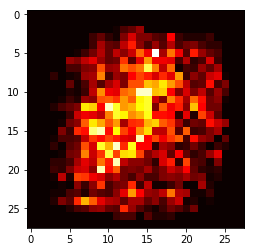

In [45]:
plt.imshow(xgboost.feature_importances_.reshape(28,28), cmap='hot', interpolation='nearest')
plt.show();

Черные пиксели совсем не важны для классификации, т.к. они пустые на большинстве или на всех картинках. 
Центральные пиксели важны, т.к. там и располагаются цифры. 

Попробуем потюнить XGBoost.

Выберите относительно большую learning_rate ($\eta\in[0.05,0.3]$), подберите оптимальное число деревьев для выбранного $\eta$. В методе `fit` задайте `eval_metric`, равное `mlogloss`, в `eval_set` передайте `[(X_test, y_test)]`; таким образом, вы сможете получать качество вашей классификации после каждого обученного базового классификатора. Вы можете регулировать "болтливость" метода обучения с помощью параметры `verbose` (например, задать его равным 10).

In [48]:
xgboost = XGBClassifier(learning_rate=0.2, n_jobs=4, random_state=12, n_estimators=500)
xgboost.fit(X_train, y_train, eval_metric='mlogloss', eval_set=[(X_test, y_test)], verbose=10);

[0]	validation_0-mlogloss:1.86833
[10]	validation_0-mlogloss:0.753074
[20]	validation_0-mlogloss:0.483065
[30]	validation_0-mlogloss:0.368815
[40]	validation_0-mlogloss:0.307262
[50]	validation_0-mlogloss:0.268673
[60]	validation_0-mlogloss:0.244123
[70]	validation_0-mlogloss:0.225746
[80]	validation_0-mlogloss:0.212702
[90]	validation_0-mlogloss:0.201838
[100]	validation_0-mlogloss:0.193651
[110]	validation_0-mlogloss:0.186563
[120]	validation_0-mlogloss:0.180492
[130]	validation_0-mlogloss:0.176075
[140]	validation_0-mlogloss:0.172745
[150]	validation_0-mlogloss:0.169059
[160]	validation_0-mlogloss:0.166019
[170]	validation_0-mlogloss:0.163778
[180]	validation_0-mlogloss:0.162256
[190]	validation_0-mlogloss:0.161497
[200]	validation_0-mlogloss:0.161058
[210]	validation_0-mlogloss:0.160342
[220]	validation_0-mlogloss:0.159448
[230]	validation_0-mlogloss:0.158842
[240]	validation_0-mlogloss:0.158488
[250]	validation_0-mlogloss:0.157911
[260]	validation_0-mlogloss:0.157496
[270]	validat

Постройте график зависимости качества классификации от числа базовых классификаторов (для этого можете воспользоваться методом `evals_result`). Для большей наглядности можете отдельно отобразить график по последним 60 точкам. Как вам кажется, какое количество базовых классификаторов будет оптимальным? 

Скорее всего, вы будете наблюдать выход качества на плато. Если вы хотите посмотреть на переобучение, попробуйте позапускать обучение на маленькой подвыборке (100-300 элементов), возможно, вы сможете его отловить. На больших сложных выборках переобучение обычно возникает при существенном количестве базовых классификаторов.

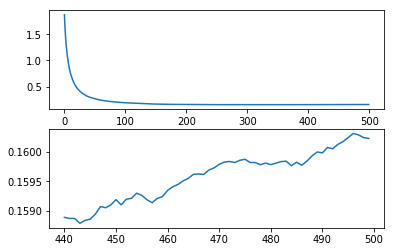

In [49]:
f, axarr = plt.subplots(2)
axarr[0].plot(xgboost.evals_result_['validation_0']['mlogloss']);
axarr[1].plot(list(range(440, 500)), xgboost.evals_result_['validation_0']['mlogloss'][440:]);

Видно уже некоторое переобучение ближе к 500 деревьям. Судя по валидации, лучшее число деревьев - 340. Его и будем использовать.

In [72]:
def get_score(classifier):
    score = {'accuracy_score': accuracy_score(y_pred=classifier.predict(X_test), y_true=y_test), 
                  'log_loss': log_loss(y_pred=classifier.predict_proba(X_test), y_true=y_test)}
    return score
    

xgboost = XGBClassifier(learning_rate=0.2, n_jobs=4, random_state=12, n_estimators=340)
xgboost.fit(X_train, y_train)
get_score(xgboost)

{'accuracy_score': 0.9568253968253968, 'log_loss': 0.15670733694691669}

Зафиксируйте выбранное количество деревьев. Настройте параметры деревьев, начиная с самых значимых (`max_depth`, `min_child_weight`, `gamma`, `colsample_bytree`). Более подробно подробно про эти параметры вы можете почитать в документации, указанной выше. Не забывайте, что бустинг, как правило, хорошо работает на деревьях небольшой глубины.

Правильно подбирать эти параметры по сетке, но данный перебор был бы чересчур трудоемким. Поэтому подбирайте их последовательно.

Считать score на каждом шаге не нужно, сравнивайте только обученные классификаторы. Сохраняйте качество (accuracy и logloss) вашего классификатора после каждого настроенного параметра.

In [33]:
from tqdm import tqdm_notebook as tqdm #это я для себя использовал, чтобы знать, сколько считаться будет 

In [50]:
for max_depth in tqdm(range(2, 8)):
    xgboost = XGBClassifier(n_estimators=340, n_jobs=4, random_state=12, learning_rate=0.2, max_depth=max_depth)
    xgboost.fit(X_train, y_train)
    print(max_depth, get_score(xgboost))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

2 {'accuracy_score': 0.94507936507936507, 'log_loss': 0.19084270969946629}
3 {'accuracy_score': 0.9568253968253968, 'log_loss': 0.15670733694691669}
4 {'accuracy_score': 0.95523809523809522, 'log_loss': 0.15029818570212156}
5 {'accuracy_score': 0.95587301587301587, 'log_loss': 0.15005929065877033}
6 {'accuracy_score': 0.95460317460317456, 'log_loss': 0.15702568933670508}
7 {'accuracy_score': 0.95174603174603178, 'log_loss': 0.15843215004748121}



In [55]:
for gamma in tqdm(np.linspace(0, 0.5, 10)):
    xgboost = XGBClassifier(n_estimators=340, n_jobs=4, random_state=12, 
                            learning_rate=0.2, max_depth=3, gamma=gamma)
    xgboost.fit(X_train, y_train)
    print(gamma, get_score(xgboost))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

0.0 {'accuracy_score': 0.9568253968253968, 'log_loss': 0.15670733694691669}
0.0555555555556 {'accuracy_score': 0.95523809523809522, 'log_loss': 0.15884613570892966}
0.111111111111 {'accuracy_score': 0.95301587301587298, 'log_loss': 0.15940854689468417}
0.166666666667 {'accuracy_score': 0.9514285714285714, 'log_loss': 0.16006861144106457}
0.222222222222 {'accuracy_score': 0.9514285714285714, 'log_loss': 0.16278316606119381}
0.277777777778 {'accuracy_score': 0.95269841269841271, 'log_loss': 0.16438614319049485}
0.333333333333 {'accuracy_score': 0.94857142857142862, 'log_loss': 0.16665523639681318}
0.388888888889 {'accuracy_score': 0.9501587301587302, 'log_loss': 0.16930747890631642}
0.444444444444 {'accuracy_score': 0.94952380952380955, 'log_loss': 0.17112986567052585}
0.5 {'accuracy_score': 0.94984126984126982, 'log_loss': 0.17456053271746391}



In [56]:
for colsample_bytree in tqdm(np.linspace(0.5, 1, 7)):
    xgboost = XGBClassifier(n_estimators=340, n_jobs=4, random_state=12, learning_rate=0.2, 
                            max_depth=3, colsample_bytree=colsample_bytree)
    xgboost.fit(X_train, y_train)
    print(colsample_bytree, get_score(xgboost))

HBox(children=(IntProgress(value=0, max=7), HTML(value='')))

0.5 {'accuracy_score': 0.95492063492063495, 'log_loss': 0.15467971352770435}
0.583333333333 {'accuracy_score': 0.9568253968253968, 'log_loss': 0.15540650666911285}
0.666666666667 {'accuracy_score': 0.95936507936507931, 'log_loss': 0.15761704406841048}
0.75 {'accuracy_score': 0.95587301587301587, 'log_loss': 0.15265542577120222}
0.833333333333 {'accuracy_score': 0.95841269841269838, 'log_loss': 0.15456966715204379}
0.916666666667 {'accuracy_score': 0.9555555555555556, 'log_loss': 0.1562331246833176}
1.0 {'accuracy_score': 0.9568253968253968, 'log_loss': 0.15670733694691669}



In [57]:
for min_child_weight in tqdm(range(1, 10)):
    xgboost = XGBClassifier(n_estimators=340, n_jobs=4, random_state=12, learning_rate=0.2, 
                            max_depth=3, gamma=0, colsample_bytree=0.66667, min_child_weight=min_child_weight)
    xgboost.fit(X_train, y_train)
    print(min_child_weight, get_score(xgboost))

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

1 {'accuracy_score': 0.95936507936507931, 'log_loss': 0.15761704406841048}
2 {'accuracy_score': 0.95523809523809522, 'log_loss': 0.15857221079586359}
3 {'accuracy_score': 0.9555555555555556, 'log_loss': 0.15710306400822155}
4 {'accuracy_score': 0.95206349206349206, 'log_loss': 0.15911568062126843}
5 {'accuracy_score': 0.95269841269841271, 'log_loss': 0.15979424175308005}
6 {'accuracy_score': 0.95238095238095233, 'log_loss': 0.16264280721341484}
7 {'accuracy_score': 0.95301587301587298, 'log_loss': 0.1621557073296665}
8 {'accuracy_score': 0.95047619047619047, 'log_loss': 0.16433887742319228}
9 {'accuracy_score': 0.9501587301587302, 'log_loss': 0.16458265854307089}



Далее таким же образом настройте регуляризацию ($\lambda, \alpha$).

In [59]:
for reg_alpha in tqdm(np.linspace(0, 1, 5)):
    xgboost = XGBClassifier(n_estimators=340, n_jobs=4, random_state=12, learning_rate=0.2, 
                            max_depth=3, gamma=0, colsample_bytree=0.66667, min_child_weight=1,
                            reg_alpha=reg_alpha)
    xgboost.fit(X_train, y_train)
    print(reg_alpha, get_score(xgboost))

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))


0.0 {'accuracy_score': 0.95936507936507931, 'log_loss': 0.15761704406841048}
0.25 {'accuracy_score': 0.95619047619047615, 'log_loss': 0.15554624840074893}
0.5 {'accuracy_score': 0.95396825396825402, 'log_loss': 0.15496458314982081}
0.75 {'accuracy_score': 0.95206349206349206, 'log_loss': 0.15727239694611575}
1.0 {'accuracy_score': 0.95301587301587298, 'log_loss': 0.15896827074930209}



In [60]:
for reg_lambda in tqdm(np.linspace(0, 1, 5)):
    xgboost = XGBClassifier(n_estimators=340, n_jobs=4, random_state=12, learning_rate=0.2, 
                            max_depth=3, gamma=0, colsample_bytree=0.66667, min_child_weight=1,
                            reg_alpha=0, reg_lambda=reg_lambda)
    xgboost.fit(X_train, y_train)
    print(reg_lambda, get_score(xgboost))

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

0.0 {'accuracy_score': 0.95746031746031746, 'log_loss': 0.16389517704864276}
0.25 {'accuracy_score': 0.95619047619047615, 'log_loss': 0.15988853721465235}
0.5 {'accuracy_score': 0.95587301587301587, 'log_loss': 0.15706865387639093}
0.75 {'accuracy_score': 0.95587301587301587, 'log_loss': 0.15730266982507143}
1.0 {'accuracy_score': 0.95936507936507931, 'log_loss': 0.15761704406841048}



После того, как все параметры настроены, уменьшите `learning_rate`, пропорционально увеличив число деревьев. Обучите итоговый классификатор.

## Увы
Я попробовал это сделать, но все попытки приводили лишь к ухудшению скора. 

Постройте 2 графика:
* по оси X отложены этапы настройки классификатора: по умолчанию, после выбора числа деревьев, после настройки каждого гиперпараметра, итоговый классификатор;
* по оси Y на первом графике - accuracy на каждом этапе, на втором - logloss.

Какой этап дал наиболее существенный прирост качества? Получилось ли у вас поднять качество выше, чем у базовых решений: kNN и Random Forest?

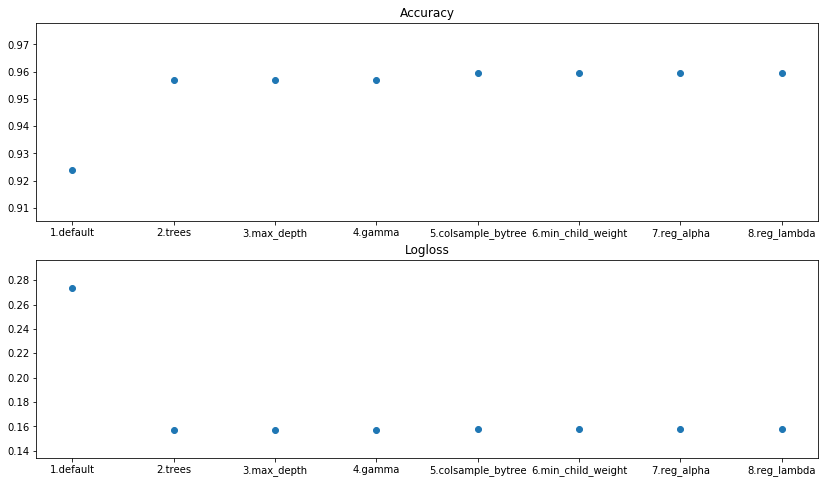

In [15]:
x = ['1.default',  '2.trees', '3.max_depth', '4.gamma', 
     '5.colsample_bytree', '6.min_child_weight', '7.reg_alpha', '8.reg_lambda']

y_ll = [0.273825460057, 0.15670733694691669, 0.15670733694691669, 0.15670733694691669, 0.15761704406841048, 
        0.15761704406841048, 0.15761704406841048, 0.15761704406841048]
y_acc = [0.92380952381, 0.9568253968253968, 0.9568253968253968, 0.9568253968253968, 0.95936507936507931, 
         0.95936507936507931, 0.95936507936507931, 0.95936507936507931] 

f, axarr = plt.subplots(2, figsize=(14,8))
axarr[0].scatter(x, y_acc)
axarr[0].set_title('Accuracy');
axarr[1].scatter(x, y_ll)
axarr[1].set_title('Logloss');

Самым прибыльным шагом был тюнинг количества деревьев. В остальных гиперпараметрах оптимальными оказались либо дефолтные значения, либо относительно близкие к ним. Да, поднять качество по сравнению с хорошо выступившим kNN удалось. 

### Keras
(6 баллов)

[Установите библиотеку keras](https://keras.io/#installation). Возможно, вам также придется [установить библиотеку tensorflow](https://www.tensorflow.org/install/).

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.utils import to_categorical

Метки классов для keras необходимо задать не номером, а в виде индикаторов, показывающих принадлежность каждому из классов. Ниже приведен код, делающих это.

In [17]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train = X_train / 255.0
X_test = X_test / 255.0

В качестве базового решения можете взять модель, которая демонстрировалась на лекции по нейронным сетям. "Соберите" сеть, обучите ее и сделайте предсказание. В качестве `batch_size` возьмите 1-2% объема обучающей выборки.

In [18]:
model = Sequential()
l2_reg = 10 ** -6

model.add(Dense(
    units=512,
    kernel_initializer='uniform',
    kernel_regularizer=l2(l2_reg),
    input_dim=len(X_train[0])
))
model.add(Activation('relu'))
model.add(Dense(
    units=512,
    kernel_initializer='uniform',
    kernel_regularizer=l2(l2_reg)
))
model.add(Activation('relu'))
model.add(Dense(
    units=num_classes,
    kernel_initializer='uniform',
    kernel_regularizer=l2(l2_reg)
))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, nesterov=True)

model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=200,
    verbose=1,
    validation_data=(X_test, y_test)
)

Train on 9450 samples, validate on 3150 samples
Epoch 1/30
9450/9450 [==============================] - 3s - loss: 2.2839 - acc: 0.1875 - val_loss: 2.2625 - val_acc: 0.2940
Epoch 2/30
9450/9450 [==============================] - 0s - loss: 2.2365 - acc: 0.4314 - val_loss: 2.2142 - val_acc: 0.4813
Epoch 3/30
9450/9450 [==============================] - 0s - loss: 2.1819 - acc: 0.5402 - val_loss: 2.1549 - val_acc: 0.5356
Epoch 4/30
9450/9450 [==============================] - 0s - loss: 2.1128 - acc: 0.5708 - val_loss: 2.0782 - val_acc: 0.5740
Epoch 5/30
9450/9450 [==============================] - 0s - loss: 2.0222 - acc: 0.6121 - val_loss: 1.9768 - val_acc: 0.6063
Epoch 6/30
9450/9450 [==============================] - 0s - loss: 1.9038 - acc: 0.6422 - val_loss: 1.8459 - val_acc: 0.6489
Epoch 7/30
9450/9450 [==============================] - 0s - loss: 1.7550 - acc: 0.6734 - val_loss: 1.6859 - val_acc: 0.6889
Epoch 8/30
9450/9450 [==============================] - 0s - loss: 1.5824 - a

Давайте попробуем подобрать структуру сети. Каких-то четких инструкций здесь нет, это довольно творческий процесс. Попробуйте варьировать следующие параметры:
* число Dense слоев (рекомендуется брать не более пяти); не забывайте после каждого Dense слоя добавлять слой активации; помните, что при большом числе слоев обучение может идти медленно и может потребоваться существенное число эпох для того, что наблюдать прирост качества.
* количество нейронов на слоях; как правило, сети проектируют так, чтобы слои сужались: сначала шли слои с большим количеством нейронов, потом - с меньшим.
* слои Dropout - вы можете добавить эти слои после скрытых слоев активации.

Также, как и в случае с xgboost, сохраняйте наилучший результат по качеству на каждом шаге.

Составьте 6-7 разных моделей и посмотрите, какое на них будет качество классификации. Сильно ли зависит результат и время обучения от конфигурации модели?

Ниже дано описание класса, с помощью которого можно логировать время обучения. Просто передайте в `fit` параметр `callbacks=[time_callback]`. После обучения вы можете получить время на каждой эпохе с помощью `time_callback.times`

In [19]:
# https://stackoverflow.com/questions/43178668/record-the-computation-time-for-each-epoch-in-keras-during-model-fit
import time 
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
        
time_callback = TimeHistory()

### Начнем с простого 

In [20]:
model = Sequential()

model.add(Dense(800, input_dim=len(X_train[0]), activation="relu", kernel_initializer="normal"))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=128,
                    epochs=100, validation_data=(X_test, y_test),
                    verbose=2, callbacks=[time_callback])

Train on 9450 samples, validate on 3150 samples
Epoch 1/100
0s - loss: 1.8699 - acc: 0.4794 - val_loss: 1.5015 - val_acc: 0.6857
Epoch 2/100
0s - loss: 1.2572 - acc: 0.7562 - val_loss: 1.0942 - val_acc: 0.7819
Epoch 3/100
0s - loss: 0.9545 - acc: 0.8138 - val_loss: 0.8796 - val_acc: 0.8181
Epoch 4/100
0s - loss: 0.7887 - acc: 0.8338 - val_loss: 0.7552 - val_acc: 0.8289
Epoch 5/100
0s - loss: 0.6870 - acc: 0.8477 - val_loss: 0.6730 - val_acc: 0.8390
Epoch 6/100
0s - loss: 0.6180 - acc: 0.8578 - val_loss: 0.6155 - val_acc: 0.8514
Epoch 7/100
0s - loss: 0.5685 - acc: 0.8661 - val_loss: 0.5730 - val_acc: 0.8597
Epoch 8/100
0s - loss: 0.5309 - acc: 0.8705 - val_loss: 0.5387 - val_acc: 0.8635
Epoch 9/100
0s - loss: 0.5012 - acc: 0.8779 - val_loss: 0.5136 - val_acc: 0.8651
Epoch 10/100
0s - loss: 0.4768 - acc: 0.8830 - val_loss: 0.4909 - val_acc: 0.8705
Epoch 11/100
0s - loss: 0.4565 - acc: 0.8865 - val_loss: 0.4729 - val_acc: 0.8778
Epoch 12/100
0s - loss: 0.4396 - acc: 0.8892 - val_loss: 0.

### Больше слоев

In [21]:
model = Sequential()

model.add(Dense(800, input_dim=len(X_train[0]), activation="relu", kernel_initializer="normal"))
model.add(Dense(70, activation="relu", kernel_initializer="normal"))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=128,
                    epochs=100, validation_data=(X_test, y_test),
                    verbose=2, callbacks=[time_callback])

Train on 9450 samples, validate on 3150 samples
Epoch 1/100
0s - loss: 2.2208 - acc: 0.2847 - val_loss: 2.1400 - val_acc: 0.4489
Epoch 2/100
0s - loss: 2.0239 - acc: 0.5563 - val_loss: 1.9006 - val_acc: 0.6267
Epoch 3/100
0s - loss: 1.7312 - acc: 0.6764 - val_loss: 1.5731 - val_acc: 0.7286
Epoch 4/100
0s - loss: 1.3876 - acc: 0.7616 - val_loss: 1.2408 - val_acc: 0.7743
Epoch 5/100
0s - loss: 1.0886 - acc: 0.8046 - val_loss: 0.9883 - val_acc: 0.8184
Epoch 6/100
0s - loss: 0.8784 - acc: 0.8303 - val_loss: 0.8188 - val_acc: 0.8321
Epoch 7/100
0s - loss: 0.7397 - acc: 0.8450 - val_loss: 0.7079 - val_acc: 0.8460
Epoch 8/100
0s - loss: 0.6462 - acc: 0.8560 - val_loss: 0.6315 - val_acc: 0.8498
Epoch 9/100
0s - loss: 0.5806 - acc: 0.8634 - val_loss: 0.5768 - val_acc: 0.8568
Epoch 10/100
0s - loss: 0.5329 - acc: 0.8701 - val_loss: 0.5359 - val_acc: 0.8597
Epoch 11/100
0s - loss: 0.4959 - acc: 0.8752 - val_loss: 0.5050 - val_acc: 0.8683
Epoch 12/100
0s - loss: 0.4666 - acc: 0.8795 - val_loss: 0.

### Дропаут

In [22]:
model = Sequential()

model.add(Dense(800, input_dim=len(X_train[0]), activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=1))
model.add(Dense(70, activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=2))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=128,
                    epochs=100, validation_data=(X_test, y_test),
                    verbose=2, callbacks=[time_callback])

Train on 9450 samples, validate on 3150 samples
Epoch 1/100
0s - loss: 2.2395 - acc: 0.2106 - val_loss: 2.1631 - val_acc: 0.3806
Epoch 2/100
0s - loss: 2.0876 - acc: 0.3742 - val_loss: 1.9670 - val_acc: 0.5584
Epoch 3/100
0s - loss: 1.8602 - acc: 0.5073 - val_loss: 1.6925 - val_acc: 0.6343
Epoch 4/100
0s - loss: 1.5881 - acc: 0.5927 - val_loss: 1.3985 - val_acc: 0.7048
Epoch 5/100
0s - loss: 1.3238 - acc: 0.6519 - val_loss: 1.1492 - val_acc: 0.7590
Epoch 6/100
0s - loss: 1.1447 - acc: 0.6810 - val_loss: 0.9695 - val_acc: 0.8000
Epoch 7/100
0s - loss: 0.9985 - acc: 0.7178 - val_loss: 0.8426 - val_acc: 0.8165
Epoch 8/100
0s - loss: 0.9051 - acc: 0.7393 - val_loss: 0.7520 - val_acc: 0.8270
Epoch 9/100
0s - loss: 0.8193 - acc: 0.7600 - val_loss: 0.6835 - val_acc: 0.8333
Epoch 10/100
0s - loss: 0.7628 - acc: 0.7722 - val_loss: 0.6324 - val_acc: 0.8394
Epoch 11/100
0s - loss: 0.7144 - acc: 0.7847 - val_loss: 0.5934 - val_acc: 0.8463
Epoch 12/100
0s - loss: 0.6738 - acc: 0.8032 - val_loss: 0.

### Попробуем не сужать сетку 

In [23]:
model = Sequential()

model.add(Dense(500, input_dim=len(X_train[0]), activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=1))
model.add(Dense(500, activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=2))
model.add(Dense(500, activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=2))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=128,
                    epochs=100, validation_data=(X_test, y_test),
                    verbose=2, callbacks=[time_callback])

Train on 9450 samples, validate on 3150 samples
Epoch 1/100
0s - loss: 2.2135 - acc: 0.2104 - val_loss: 2.0154 - val_acc: 0.5565
Epoch 2/100
0s - loss: 1.9201 - acc: 0.4392 - val_loss: 1.6342 - val_acc: 0.7365
Epoch 3/100
0s - loss: 1.5528 - acc: 0.5964 - val_loss: 1.1968 - val_acc: 0.7933
Epoch 4/100
0s - loss: 1.1949 - acc: 0.6807 - val_loss: 0.8696 - val_acc: 0.8222
Epoch 5/100
0s - loss: 0.9538 - acc: 0.7316 - val_loss: 0.6891 - val_acc: 0.8425
Epoch 6/100
0s - loss: 0.8045 - acc: 0.7676 - val_loss: 0.5947 - val_acc: 0.8457
Epoch 7/100
0s - loss: 0.7242 - acc: 0.7800 - val_loss: 0.5363 - val_acc: 0.8505
Epoch 8/100
0s - loss: 0.6623 - acc: 0.7980 - val_loss: 0.4909 - val_acc: 0.8632
Epoch 9/100
0s - loss: 0.6146 - acc: 0.8104 - val_loss: 0.4617 - val_acc: 0.8702
Epoch 10/100
0s - loss: 0.5814 - acc: 0.8220 - val_loss: 0.4402 - val_acc: 0.8740
Epoch 11/100
0s - loss: 0.5465 - acc: 0.8366 - val_loss: 0.4194 - val_acc: 0.8803
Epoch 12/100
0s - loss: 0.5194 - acc: 0.8394 - val_loss: 0.

### Больше слоев!!!

In [26]:
model = Sequential()

model.add(Dense(800, input_dim=len(X_train[0]), activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=1))
model.add(Dense(800, activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=2))
model.add(Dense(800, activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=2))
model.add(Dense(500, activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=2))
model.add(Dense(500, activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=2))
model.add(Dense(500, activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.25, seed=2))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=128,
                    epochs=100, validation_data=(X_test, y_test),
                    verbose=2, callbacks=[time_callback])

Train on 9450 samples, validate on 3150 samples
Epoch 1/100
0s - loss: 2.3193 - acc: 0.1304 - val_loss: 2.1431 - val_acc: 0.3984
Epoch 2/100
0s - loss: 2.1774 - acc: 0.2180 - val_loss: 1.9053 - val_acc: 0.5714
Epoch 3/100
0s - loss: 1.9418 - acc: 0.3471 - val_loss: 1.4520 - val_acc: 0.6311
Epoch 4/100
0s - loss: 1.5557 - acc: 0.4728 - val_loss: 0.9966 - val_acc: 0.7305
Epoch 5/100
0s - loss: 1.2435 - acc: 0.5671 - val_loss: 0.7808 - val_acc: 0.7641
Epoch 6/100
0s - loss: 1.0531 - acc: 0.6241 - val_loss: 0.6633 - val_acc: 0.8025
Epoch 7/100
0s - loss: 0.9199 - acc: 0.6803 - val_loss: 0.5884 - val_acc: 0.8143
Epoch 8/100
0s - loss: 0.8253 - acc: 0.7175 - val_loss: 0.5257 - val_acc: 0.8352
Epoch 9/100
0s - loss: 0.7569 - acc: 0.7451 - val_loss: 0.4888 - val_acc: 0.8486
Epoch 10/100
0s - loss: 0.6916 - acc: 0.7709 - val_loss: 0.4527 - val_acc: 0.8616
Epoch 11/100
0s - loss: 0.6275 - acc: 0.7939 - val_loss: 0.4226 - val_acc: 0.8711
Epoch 12/100
0s - loss: 0.6106 - acc: 0.8008 - val_loss: 0.

Выберите 1-2 модели, которые дали наилучший результат. Подберите параметры в них: попробуйте выбрать различные функции активации, коэффициент Dropout, коэффициенты регуляризации. Проведите порядка 10 экспериментов. Как настройка слоев влияет на качество модели? Сильно ли различается результат?

Коэффициенты регуляризации передаются в Dense слои с помощью `kernel_regularizer=l2(l2_coef)`. Рекомендуется провести эксперимент с коэффициентами от $10^{-6}$ до $10^{-4}$.

Попытайтесь подобрать для SGD начальный `learning_rate`, темп его снижения `decay`. Диапазоны параметров, с которыми рекомендуется провести эксперименты:
- `learning rate`: от 0.005 до 0.1,
- `decay`: от $10^{-9}$ до $10^{-5}$.

Возьмем последнюю модель, будем тюнить ее. 

In [34]:
scores = []

regs = [0.000001, 0.00005, 0.00001, 0.0005, 0.0001]

for l in tqdm(regs):
    model = Sequential()

    model.add(Dense(800, input_dim=len(X_train[0]), activation="relu", 
                    kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=1))
    model.add(Dense(800, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(800, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(500, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(500, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(500, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

    model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

    history = model.fit(X_train, y_train, batch_size=128,
                        epochs=100, validation_data=(X_test, y_test),
                        verbose=0, callbacks=[time_callback])
    scores.append(model.evaluate(X_test, y_test)[1])

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

2976/3150 [===========================>..] - ETA: 0s


In [39]:
print(np.argmax(scores))
print(np.max(scores))

4
0.954603174603


Лучший коэф. регуляризации получился 0.0001.

In [43]:
l = 0.0001

lrates = [0.005, 0.01, 0.05, 0.1]

for lr in tqdm(lrates):
    model = Sequential()
    model.add(Dense(800, input_dim=len(X_train[0]), activation="relu", 
                    kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=1))
    model.add(Dense(800, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(800, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(500, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(500, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(500, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

    model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=lr), metrics=["accuracy"])

    history = model.fit(X_train, y_train, batch_size=128,
                        epochs=100, validation_data=(X_test, y_test),
                        verbose=0, callbacks=[time_callback])
    scores.append(model.evaluate(X_test, y_test)[1])
print(np.argmax(scores))
print(np.max(scores))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))


2720/3150 [========================>.....] - ETA: 0s
7
0.959682539683


Лучшая скорость обучения вышла 0.05

In [45]:
decays = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001]
for dec in tqdm(decays):
    model = Sequential()
    model.add(Dense(800, input_dim=len(X_train[0]), activation="relu", 
                    kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=1))
    model.add(Dense(800, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(800, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(500, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(500, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(500, activation="relu", kernel_initializer="normal", kernel_regularizer=l2(l)))
    model.add(Dropout(rate=0.25, seed=2))
    model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

    model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=lr), metrics=["accuracy"])

    history = model.fit(X_train, y_train, batch_size=128,
                        epochs=100, validation_data=(X_test, y_test),
                        verbose=0, callbacks=[time_callback])
    scores.append(model.evaluate(X_test, y_test)[1])
print(np.argmax(scores))
print(np.max(scores))

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

3072/3150 [============================>.] - ETA: 0s
12
0.962222222222


Лучший decay оказался равен 0.000001.

Выберите лучшую сеть, обучите ее и оцените качество. Сделайте графики зависимости качества классификации от этапа настройки параметров.

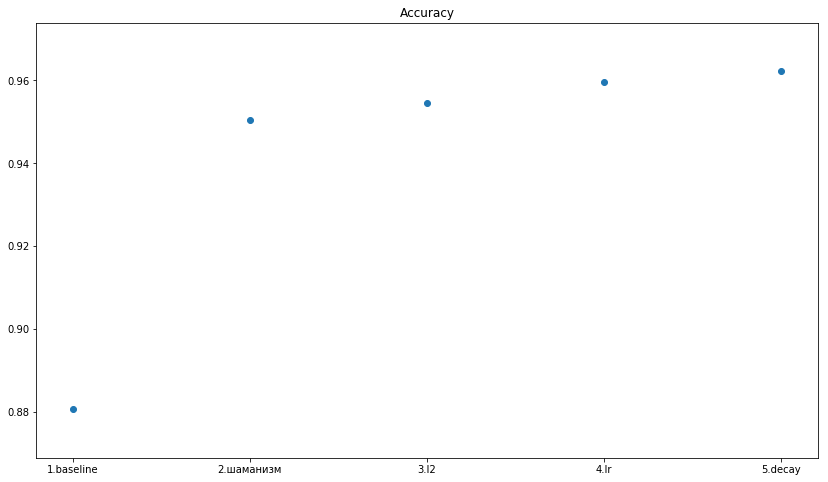

In [48]:
x = ['1.baseline',  '2.шаманизм', '3.l2', '4.lr', '5.decay']

y_acc = [0.8806, 0.9505, 0.954603174603, 0.959682539683, 0.962222222222] 

plt.figure(figsize=(14,8))
plt.scatter(x, y_acc)
plt.title('Accuracy');

Самый большой скачок качества дал шаманизм со слоями и числом нейронов в них. Следующие шаги тоже дали ощутимый прирост, но не такой большой. 


### Сверточная сеть

Конечно, правильно было бы попробовать и ее, но тогда задание получится чрезмерно трудоемким. =) Поэтому этот пункт необязателен к выполнению. Однако, вы можете самостоятельно разобраться в конструировании сверточных сетей и оценить качество их работы. Для построения сверточного блока вам необходимо реализовать последовательность свертки ([Convolution2D](https://keras.io/layers/convolutional/#conv2d)), нелинейности (ReLU) и пулинга ([MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d)). Почитайте документацию, посмотрите примеры сверточных сетей в аналогичных работах.

Да, бонусные баллы (до +6) за реализацию этого пункта ставиться будут.

### Cделаем что-то вроде очень небольшой VGG 

In [66]:
from keras.optimizers import RMSprop #более эффективен, чем SDG 
from keras.preprocessing.image import ImageDataGenerator #будем применять аугментацию в реальном времени 
from keras.layers import Conv2D, MaxPool2D, Flatten 
from keras.callbacks import ReduceLROnPlateau #уменьшение learning rate на плато может помочь 

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(500, activation="relu", kernel_initializer='normal'))
model.add(Dropout(0.25))
model.add(Dense(200, activation="relu", kernel_initializer='normal'))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=RMSprop(), loss="categorical_crossentropy", metrics=["accuracy"])

In [62]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                 patience=3, 
                                 factor=0.5, 
                                 min_lr=0.00001)

In [63]:
epochs = 30 
batch_size = 128

In [64]:
data_gen = ImageDataGenerator(rotation_range=10,  #случайный поворот от 0 до 10 градусов
                             zoom_range = 0.1, #случайный зум
                             width_shift_range=0.1,  #случайный сдвиг по ширине
                             height_shift_range=0.1,  #случайный сдвиг по высоте 
                            ) 

datagen.fit(X_train)

In [67]:
history = model.fit_generator(data_gen.flow(X_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(X_test, y_test),
                              verbose=2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[lr_reduction, time_callback])

Epoch 1/30
3s - loss: 1.2690 - acc: 0.5647 - val_loss: 0.1923 - val_acc: 0.9416
Epoch 2/30
2s - loss: 0.3984 - acc: 0.8745 - val_loss: 0.1089 - val_acc: 0.9660
Epoch 3/30
2s - loss: 0.2676 - acc: 0.9166 - val_loss: 0.0851 - val_acc: 0.9762
Epoch 4/30
2s - loss: 0.1861 - acc: 0.9431 - val_loss: 0.0996 - val_acc: 0.9686
Epoch 5/30
2s - loss: 0.1655 - acc: 0.9496 - val_loss: 0.0780 - val_acc: 0.9778
Epoch 6/30
2s - loss: 0.1329 - acc: 0.9591 - val_loss: 0.0726 - val_acc: 0.9765
Epoch 7/30
2s - loss: 0.1301 - acc: 0.9602 - val_loss: 0.0510 - val_acc: 0.9844
Epoch 8/30
2s - loss: 0.1117 - acc: 0.9662 - val_loss: 0.0489 - val_acc: 0.9848
Epoch 9/30
2s - loss: 0.1031 - acc: 0.9691 - val_loss: 0.0454 - val_acc: 0.9860
Epoch 10/30
2s - loss: 0.0942 - acc: 0.9723 - val_loss: 0.0477 - val_acc: 0.9844
Epoch 11/30
2s - loss: 0.0898 - acc: 0.9718 - val_loss: 0.0469 - val_acc: 0.9829
Epoch 12/30
2s - loss: 0.0888 - acc: 0.9726 - val_loss: 0.0531 - val_acc: 0.9819
Epoch 13/30
2s - loss: 0.0770 - acc: 

### Выводы
(3 балла)

Сравните наилучшую модель, полученную на xgboost, с наилучшей моделью, обученной с помощью keras.

Как различаются точность, logloss, время обучения? Какую модель легче и удобнее настраивать? Какая модель вам показалась наиболее гибкой?

Какие плюсы и минусы вы бы отметили у двух данных моделей машинного обучения?

## Рассуждения 
XGBoost - очень хороший метод машинного обучения, но он не конкурент сверточным нейросетям в задачах на таких сложных объектах, как изображения, тексты, звуковые сигналы т.к. он не умеет извлекать иерархические признаки. 
Конечно, когда разговор идет о других задачах, то лучше использовать градиентный бустинг, потому что его легче настраивать, он быстрее работает, (как правило) требует меньше обучающих примеров, чем нейросети. 

Самая хорошая модель XGBoost сравнима по качеству с самым хорошим MLP. Сравнивать времена обучения не буду, т.к. XGBoost у меня собран под CPU, а tensorflow (вычислительный бэкенд Keras) - под GPU. 

Обучите модели, взяв всю выборку (42000 объектов). Конечно, из-за перехода к более объемной выборке правильно будет подбирать параметры заново, но можете оставить текущие параметры, увеличив число деревьев в XGBoost или число эпох в нейронной сети, слегка снизив `learning_rate`). [Скачайте с kaggle](https://www.kaggle.com/c/digit-recognizer/data) набор тестовых данных, сделайте на них предсказание для каждой модели и отправьте оба результата (submit predictions) в Kaggle.

Какой результат у вас получился? Сильно ли он отличается от того, что вы видели на эксперименте?

In [74]:
digits, labels = load_data(1)

digits = digits / 255.0 
test = pd.read_csv('test.csv') / 255.0


X_train, X_test, y_train, y_test = train_test_split(digits, labels, test_size=0.2)

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

history = model.fit_generator(data_gen.flow(X_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(X_test, y_test),
                              verbose=2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[lr_reduction, time_callback])

test = np.array(test).reshape(-1,28,28,1)

cnn_preds = pd.Series(np.argmax(model.predict(test), axis=1), name='Label')
submission = pd.concat([pd.Series(range(1,28001), name='ImageId'), cnn_preds], axis=1)
submission.to_csv('hw_cnn_preds.csv', index=False)

Epoch 1/30
9s - loss: 0.0434 - acc: 0.9873 - val_loss: 0.0170 - val_acc: 0.9946
Epoch 2/30
8s - loss: 0.0446 - acc: 0.9872 - val_loss: 0.0161 - val_acc: 0.9939
Epoch 3/30
8s - loss: 0.0431 - acc: 0.9875 - val_loss: 0.0152 - val_acc: 0.9948
Epoch 4/30
9s - loss: 0.0426 - acc: 0.9875 - val_loss: 0.0172 - val_acc: 0.9937
Epoch 5/30
9s - loss: 0.0372 - acc: 0.9892 - val_loss: 0.0153 - val_acc: 0.9949
Epoch 6/30
9s - loss: 0.0408 - acc: 0.9880 - val_loss: 0.0140 - val_acc: 0.9952
Epoch 7/30
8s - loss: 0.0402 - acc: 0.9878 - val_loss: 0.0173 - val_acc: 0.9937
Epoch 8/30
8s - loss: 0.0390 - acc: 0.9887 - val_loss: 0.0156 - val_acc: 0.9952
Epoch 9/30
8s - loss: 0.0353 - acc: 0.9892 - val_loss: 0.0170 - val_acc: 0.9945
Epoch 10/30

Epoch 00009: reducing learning rate to 0.0001250000059371814.
8s - loss: 0.0354 - acc: 0.9894 - val_loss: 0.0156 - val_acc: 0.9950
Epoch 11/30
9s - loss: 0.0315 - acc: 0.9902 - val_loss: 0.0153 - val_acc: 0.9949
Epoch 12/30
9s - loss: 0.0305 - acc: 0.9908 - val_loss:

In [78]:
xgboost = XGBClassifier(n_estimators=340, n_jobs=4, random_state=12, learning_rate=0.2, 
                        max_depth=3, gamma=0, colsample_bytree=0.66667, min_child_weight=1)
xgboost.fit(digits, labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.66667, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=340, n_jobs=4, nthread=None,
       objective='multi:softprob', random_state=12, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [86]:
test = pd.read_csv('test.csv') / 255.0
test = test.values
y_xgb = xgboost.predict(test)

In [88]:
xgb_preds = pd.Series(y_xgb, name='Label')
submission = pd.concat([pd.Series(range(1,28001), name='ImageId'), xgb_preds], axis=1)
submission.to_csv('hw_xgb_preds.csv', index=False)

## Kaggle 
Сверточная сеть получила 0.99614 на паблик лидерборде. XGBoost получил 0.97028. 